# Assignment 5 – Machine Learning in R

**Author**: Olivia 
**Date**: 7/24/25
**Environment**: See `environment.yml`  
**Description**:  
This notebook explores basic machine learning using [scikit-learn/caret/etc.], including data preparation, model training, and evaluation.

## 1. Downloading, Installing, and Starting R

### 1.1 Download R 

In [2]:
# This was done in our environment that we made

### 1.2 Install R

In [3]:
# This was done in our environment that we made

### 1.3 Start R

In [4]:
# This was done in our environment that we made

### 1.4 Install Packages

In [5]:
#Here we load in the packages that we installed in our environment and then print where they are located
library(tidyverse)
library(caret)
library(ggplot2)
library(ellipse)
library(kernlab)
library(randomForest)
.libPaths()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs



Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


At

[1] "/users/PAS2797/oliviaschneider03/.conda/envs/Assignment-5-r/lib/R/library"

## 2. Load the Data

### 2.1 Load Data the Easy Way

In [67]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

### 2.2 Load From CSV

In [7]:
#We load in the dataset into our folder and then tell the system to read and name it
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

### 2.3 Create a Validation Dataset

In [8]:
#Here we seperate our dataset into 2 subsets, one is used to train our system on what we want it to do and the next is used to validate our model later on
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

## 3. Summarize Dataset

### 3.1 Dimensions of Dataset

In [9]:
#Tells us home many rows and columns our dataset has
# dimensions of dataset
dim(dataset)

[1] 120   5

### 3.2 Types of Attributes

In [71]:
# This command lists what kind of data each column contains
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"  "character"

### 3.3 Peak at the Data

In [10]:
#This shows the first 5 lines of your dataset
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


### 3.4 Levels of the Class 

In [11]:
# list the levels for the class
class(dataset$Species)
dataset$Species <- as.factor(dataset$Species)
levels(dataset$Species)

[1] "character"

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

### 3.5 Class Distribution

In [12]:
# This tells me how many datapoints of each category there are
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


### 3.6 Statistical Summary

In [13]:
# This provides basic statistics on each category of our dataset
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.700   Median :3.000   Median :4.250   Median :1.300  
 Mean   :5.802   Mean   :3.032   Mean   :3.732   Mean   :1.202  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

## 4. Visualize dataset

### 4.1 Univariate Plots

In [14]:
# Here we seperate our data into input and output
x <- dataset[,1:4]
y <- dataset[,5]

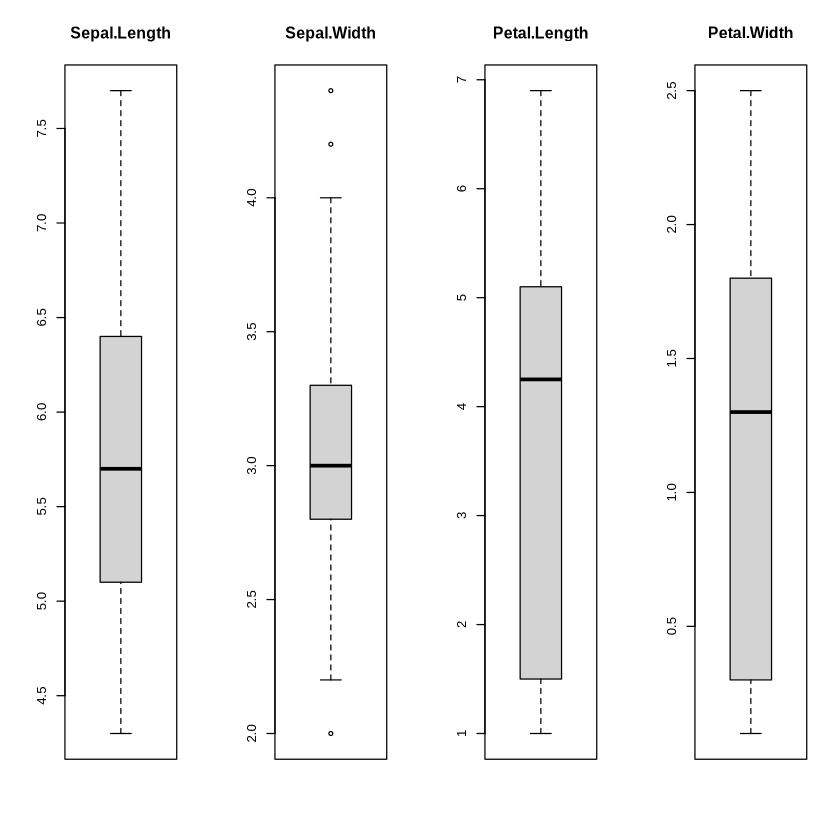

In [15]:
# This then allows us to boxplot our datapoints individually 
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

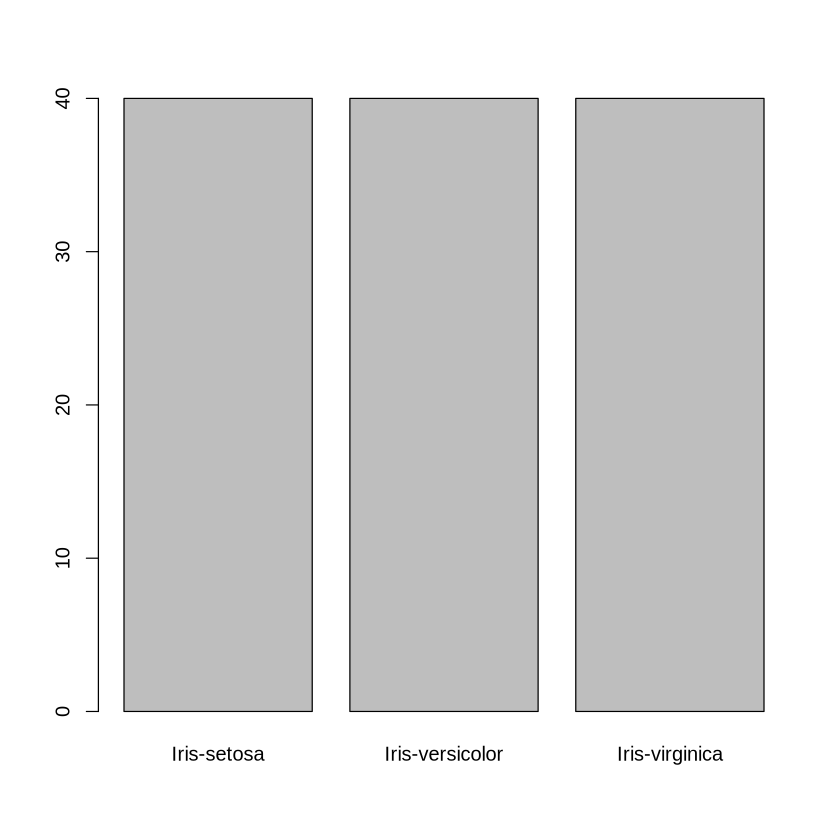

In [16]:
# We also then can use a barplot to understand class breakdown
plot(y)

### 4.2 Multivariate Plots

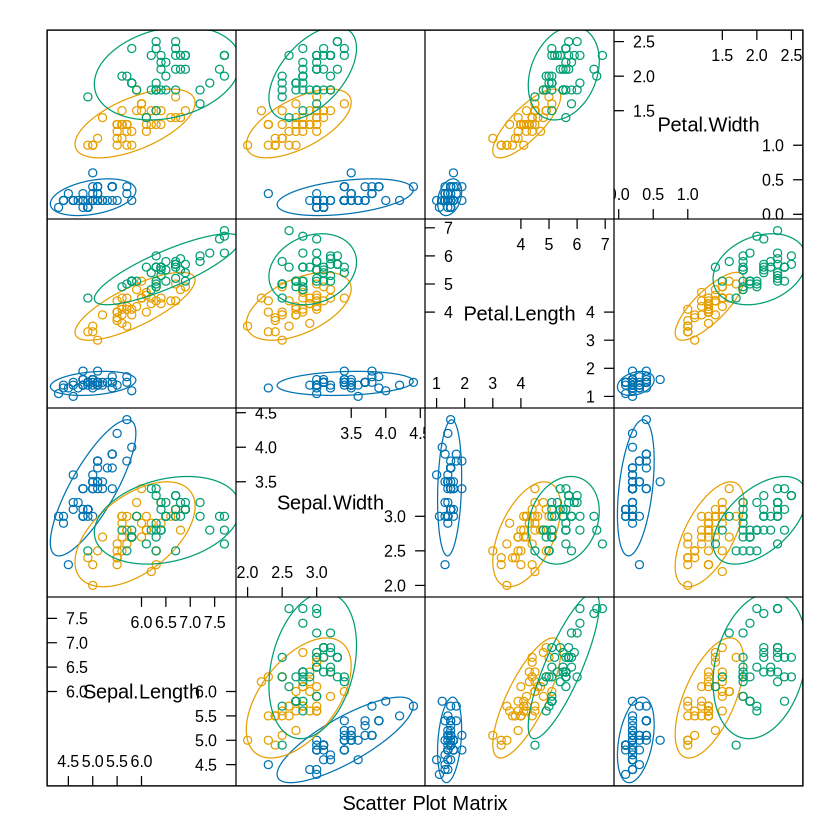

In [17]:
# This command then makes a scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

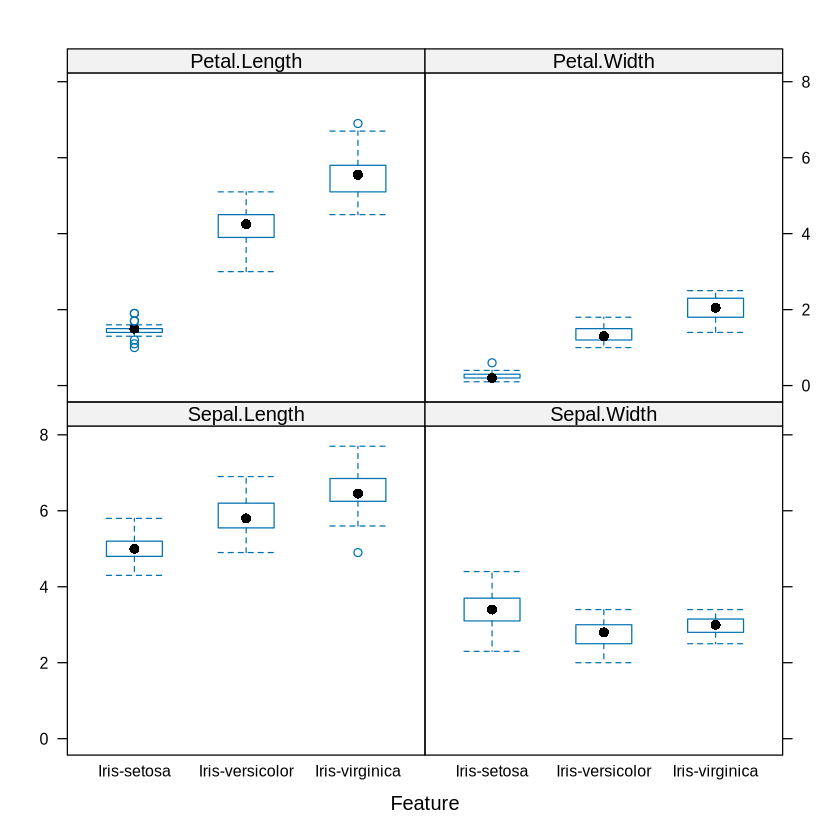

In [18]:
# We then make box and whisker plots of the same data to visualize it in a different manner
featurePlot(x=x, y=y, plot="box")

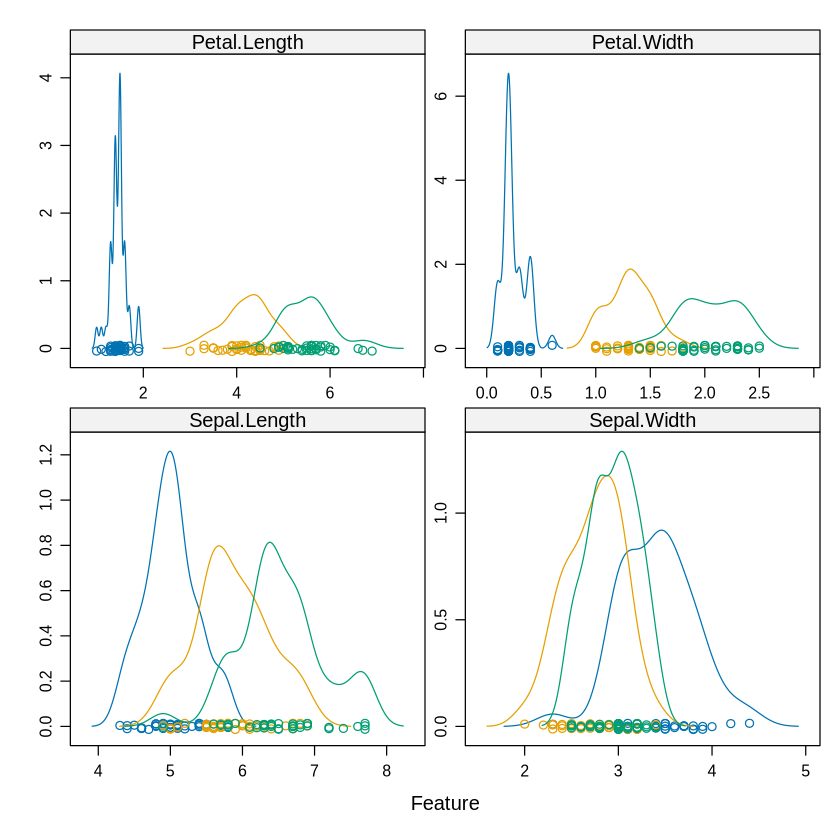

In [19]:
# Lastly, we then can visualize our data with density plots using multiple variables
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## 5. Evaluate Some Algorithms

### 5.1 Test Harness

In [20]:
# We now seperate our data points into seperate categories 
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### 5.2 Build Models

In [21]:
# Here we set up our 5 seperate models that we are using to analyze our machine learning model

# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

### 5.3 Select Best Model

In [22]:
# This tells us how accurate each of the models is
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 0.9375000 1.0000000 0.9750000 1.0000000    1    0
cart 0.8333333 0.8541667 0.9166667 0.9083333 0.9166667    1    0
knn  0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0
svm  0.8333333 0.9166667 0.9166667 0.9416667 1.0000000    1    0
rf   0.8333333 0.9166667 0.9166667 0.9416667 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 0.90625  1.000 0.9625   1.000    1    0
cart 0.750 0.78125  0.875 0.8625   0.875    1    0
knn  0.750 0.90625  1.000 0.9500   1.000    1    0
svm  0.750 0.87500  0.875 0.9125   1.000    1    0
rf   0.750 0.87500  0.875 0.9125   1.000    1    0


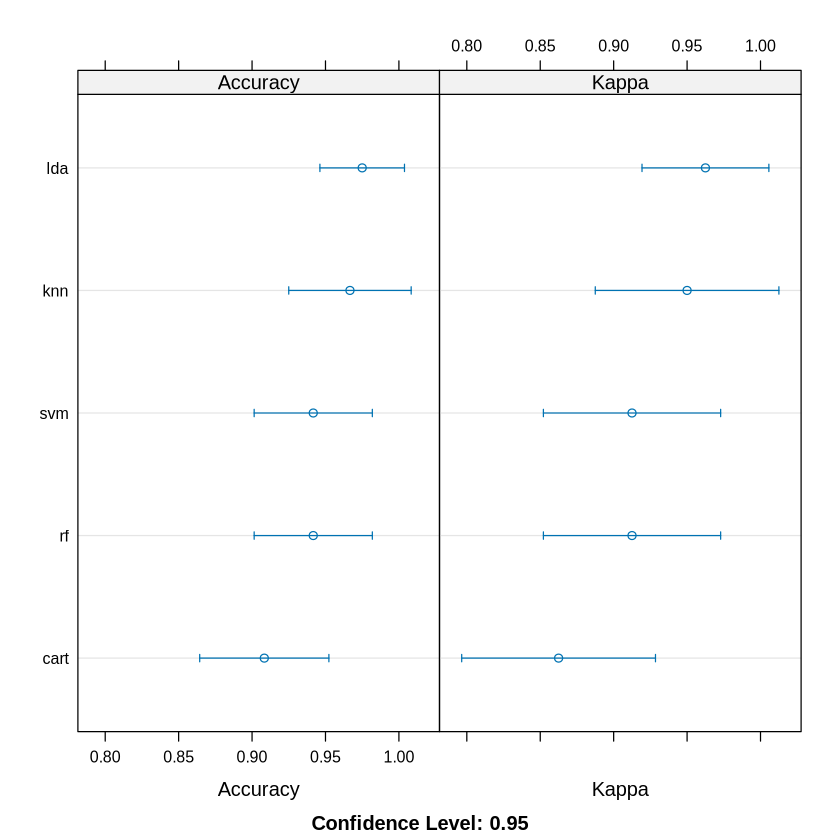

In [23]:
# This compares the accuracy of models in a dotplot format
dotplot(results)

In [24]:
# This command is used to summarize the results of our analysis on the various models
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



## 6. Make predictions

In [25]:
# We use this to make estimations using our validation data 
predictions <- predict(fit.lda, validation)
combined_levels <- union(levels(factor(predictions)), levels(factor(validation$Species)))
pred <- factor(predictions, levels = combined_levels)
ref  <- factor(validation$Species, levels = combined_levels)
confusionMatrix(pred, ref)


Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              0
  Iris-virginica            0               0             10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value                   1.0000                 1.0